# Important Note!
These notebooks are a part of the data resources I used in my training program, 'Python For Finance Nanodegree', wherein I train students in the fundamentals of using Python to analyze and understand financial data.

Not to brag😅, but some of my students have in fact gone on to pursue highly rewarding careers in techno-finance after my program.

Do feel free to hit me up for any doubts. Would love to help!
<br><br>
**Visit**: [Python For Finance Nanodegree](https://python.jobaaj.com/)<br>
**Email**: contact@jobaaj.com<br>
**Contact**: +91 73035 12500<br>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [3]:
!pip install yfinance

In [4]:
import yfinance as yf

In [5]:
df=yf.download("INR=X")

[*********************100%***********************]  1 of 1 completed


In [6]:
df=df.Close

In [7]:
df=pd.DataFrame(df)
df

,Close
Date,
2003-12-01,45.709999
2003-12-02,45.629002
2003-12-03,45.549999
2003-12-04,45.548000
2003-12-05,45.449001
...,...
2022-08-03,78.604500
2022-08-04,79.118301
2022-08-05,79.154900


In [8]:
df["returns"]=np.log(df.div(df.shift(1)))

In [9]:
df

,Close,returns
Date,,
2003-12-01,45.709999,NaN
2003-12-02,45.629002,-0.001774
2003-12-03,45.549999,-0.001733
2003-12-04,45.548000,-0.000044
2003-12-05,45.449001,-0.002176
...,...,...
2022-08-03,78.604500,-0.004458
2022-08-04,79.118301,0.006515
2022-08-05,79.154900,0.000462


In [10]:
df.dropna(inplace=True)

In [11]:
df

,Close,returns
Date,,
2003-12-02,45.629002,-0.001774
2003-12-03,45.549999,-0.001733
2003-12-04,45.548000,-0.000044
2003-12-05,45.449001,-0.002176
2003-12-08,45.470001,0.000462
...,...,...
2022-08-03,78.604500,-0.004458
2022-08-04,79.118301,0.006515
2022-08-05,79.154900,0.000462


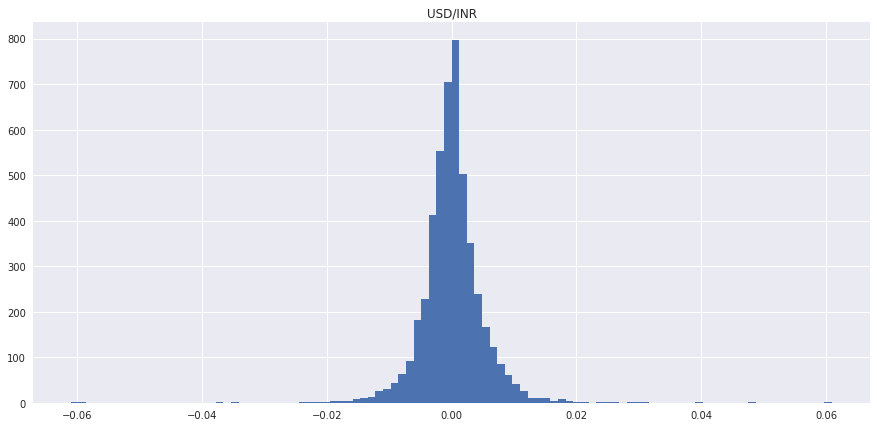

In [12]:
df.returns.hist(bins=100,figsize=(15,7))
plt.title("USD/INR")
plt.show()

In [13]:
df.returns.sum()

0.5547208669016362

### Conclusion
If we would have invested in USD on 2003-12-01, We would have got **55.42%** return by 2022-08-09

### Note 
To get more clarity let's checkwith a diffreent method let's divide the value present at the last index by the value present at the 0 index

In [14]:
np.exp(df.returns.sum())

1.7414548192454304

In [15]:
df.Close[-1]/df.Close[0]

1.7445461301294192

In [16]:
#cumulative returns 
df.returns.cumsum()

Date
2003-12-02   -0.001774
2003-12-03   -0.003506
2003-12-04   -0.003550
2003-12-05   -0.005726
2003-12-08   -0.005264
                ...   
2022-08-03    0.542112
2022-08-04    0.548627
2022-08-05    0.549090
2022-08-08    0.552315
2022-08-09    0.554721
Name: returns, Length: 4844, dtype: float64

In [17]:
df.returns.cumsum().apply(np.exp)

Date
2003-12-02    0.998228
2003-12-03    0.996500
2003-12-04    0.996456
2003-12-05    0.994290
2003-12-08    0.994750
                ...   
2022-08-03    1.719635
2022-08-04    1.730875
2022-08-05    1.731676
2022-08-08    1.737270
2022-08-09    1.741455
Name: returns, Length: 4844, dtype: float64

In [18]:
df["creturns"]=df.returns.cumsum().apply(np.exp)

In [19]:
df

,Close,returns,creturns
Date,,,
2003-12-02,45.629002,-0.001774,0.998228
2003-12-03,45.549999,-0.001733,0.996500
2003-12-04,45.548000,-0.000044,0.996456
2003-12-05,45.449001,-0.002176,0.994290
2003-12-08,45.470001,0.000462,0.994750
...,...,...,...
2022-08-03,78.604500,-0.004458,1.719635
2022-08-04,79.118301,0.006515,1.730875
2022-08-05,79.154900,0.000462,1.731676


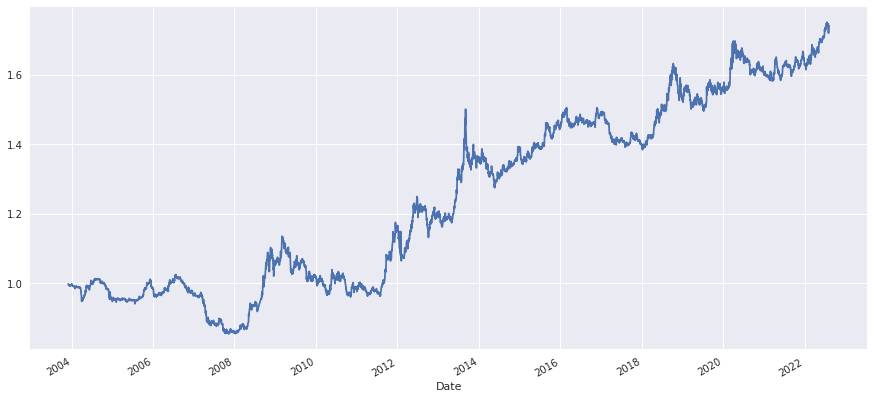

In [20]:
df.creturns.plot(figsize=(15,7))
plt.show()